In [1]:
# CASA_0007 Quantitative Methods
# Individual assignments

# Quality of life associated with population density in London?

In [2]:
import pandas as pd
from sklearn.linear_model import LinearRegression
import statsmodels.api as sm
import statsmodels.formula.api as smf
import statsmodels.stats.api as sms
import scipy.stats as st

import numpy as np

import sklearn
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix

import matplotlib.pyplot as plt
import seaborn as sn

pd.set_option('display.max_rows', 300) # specifies number of rows to show
pd.options.display.float_format = '{:40,.4f}'.format # specifies default number format to 4 decimal places
plt.style.use('ggplot') # specifies that graphs should use ggplot styling
sn.set(font_scale=1.5)
%matplotlib inline

In [3]:
import statsmodels
print(statsmodels.__version__)

0.13.2


### Read in Data

In [ ]:
# read in 2011 lsoa dataset

lsoa2011 = pd.read_csv('https://raw.githubusercontent.com/yanqizeng/qm_assessment/main/IA_lsoa_data_marked_06.csv')
lsoa2011.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4835 entries, 0 to 4834
Data columns (total 16 columns):
 #   Column                                                              Non-Null Count  Dtype  
---  ------                                                              --------------  -----  
 0   lower_super_output_area                                             4835 non-null   object 
 1   names                                                               4835 non-null   object 
 2   population_density                                                  4835 non-null   float64
 3   population_density_log                                              4835 non-null   float64
 4   household_composition_couple_household_without_dependent_children   4835 non-null   float64
 5   household_composition_other_multi_person_household                  4835 non-null   float64
 6   tenure_owned_outright                                               4835 non-null   float64
 7   tenure_owned_wi

In [22]:
# read in 2021 population density

# before Log
# population2011 = pd.read_csv('population_density_sx.csv')

# after Log
population2011 = pd.read_csv('https://raw.githubusercontent.com/yanqizeng/qm_assessment/main/IA_population%20density.csv')

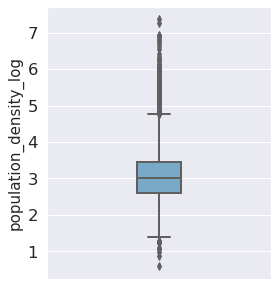

In [23]:
# Boxplot
# check whether normal distributed

import seaborn as sns

plt.figure(figsize=(4, 5))
ax = sns.boxplot(y='population_density_log', data=population2011, palette='Blues',width= 0.2,linewidth=2)
ax.set_ylabel(ax.get_ylabel(), fontsize = 15)

plt.savefig("Boxplot", dpi=100, bbox_inches = "tight")

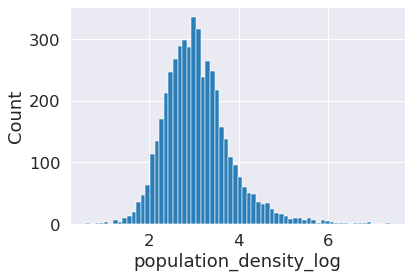

In [24]:
# Histogram
# check whether normal distributed

import seaborn as sns

sns.histplot(x='population_density_log', data=population2011, color=['tab:blue'])
ax2 = sns.histplot(x='population_density_log', data=population2011, color=['tab:blue'])

plt.savefig("Histogram", dpi=100, bbox_inches = "tight")

### The degree of correlation between x and y

In [29]:
# Pearson Correlation Coefficient 
# Calculate the degree of correlation between x and y

lsoa2011_xandy = lsoa2011.iloc[:,2:31]
lsoa2011_xandy.corr()

,population_density,population_density_log,household_composition_couple_household_without_dependent_children,household_composition_other_multi_person_household,tenure_owned_outright,tenure_owned_with_a_mortgage_or_loan,dwelling_type_whole_house_or_bungalow_detached,dwelling_type_flat_maisonette_or_apartment,economic_activity_employment_rate,qualifications_highest_level_of_qualification_apprenticeship,qualifications_highest_level_of_qualification_other_qualifications,health_fair_health,health_bad_or_very_bad_health,road_casualties_2011_total
population_density,1.0000,0.6733,0.2573,-0.1975,0.2450,0.1733,0.3420,-0.2156,0.0348,0.2341,-0.1431,0.0608,-0.0635,0.2019
population_density_log,0.6733,1.0000,0.4851,-0.3907,0.5007,0.4445,0.4846,-0.4862,0.1114,0.4329,-0.2633,0.1226,-0.1844,0.2005
household_composition_couple_household_without_dependent_children,0.2573,0.4851,1.0000,-0.4780,0.8584,0.7172,0.5449,-0.5852,0.5460,0.5168,-0.5460,-0.1714,-0.5238,-0.1132
household_composition_other_multi_person_household,-0.1975,-0.3907,-0.4780,1.0000,-0.4156,-0.4005,-0.2718,0.2987,-0.1890,-0.5538,0.6296,-0.1821,0.0692,0.1214
tenure_owned_outright,0.2450,0.5007,0.8584,-0.4156,1.0000,0.7102,0.5648,-0.7007,0.3370,0.4971,-0.3623,-0.0375,-0.4490,-0.1256
tenure_owned_with_a_mortgage_or_loan,0.1733,0.4445,0.7172,-0.4005,0.7102,1.0000,0.3398,-0.8055,0.4402,0.5879,-0.4257,-0.0535,-0.4625,-0.2097
dwelling_type_whole_house_or_bungalow_detached,0.3420,0.4846,0.5449,-0.2718,0.5648,0.3398,1.0000,-0.4257,0.0484,0.2627,-0.2357,0.0154,-0.2049,-0.0638
dwelling_type_flat_maisonette_or_apartment,-0.2156,-0.4862,-0.5852,0.2987,-0.7007,-0.8055,-0.4257,1.0000,-0.0717,-0.5941,0.2201,-0.1983,0.2122,0.2034
economic_activity_employment_rate,0.0348,0.1114,0.5460,-0.1890,0.3370,0.4402,0.0484,-0.0717,1.0000,0.0784,-0.4219,-0.5480,-0.6458,-0.0145
qualifications_highest_level_of_qualification_apprenticeship,0.2341,0.4329,0.5168,-0.5538,0.4971,0.5879,0.2627,-0.5941,0.0784,1.0000,-0.4352,0.3668,-0.0194,-0.1311


*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.
*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.
*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.
*c* argument looks like a single numeric RGB or R

<AxesSubplot:xlabel='road_casualties_2011_total', ylabel='population_density_log'>

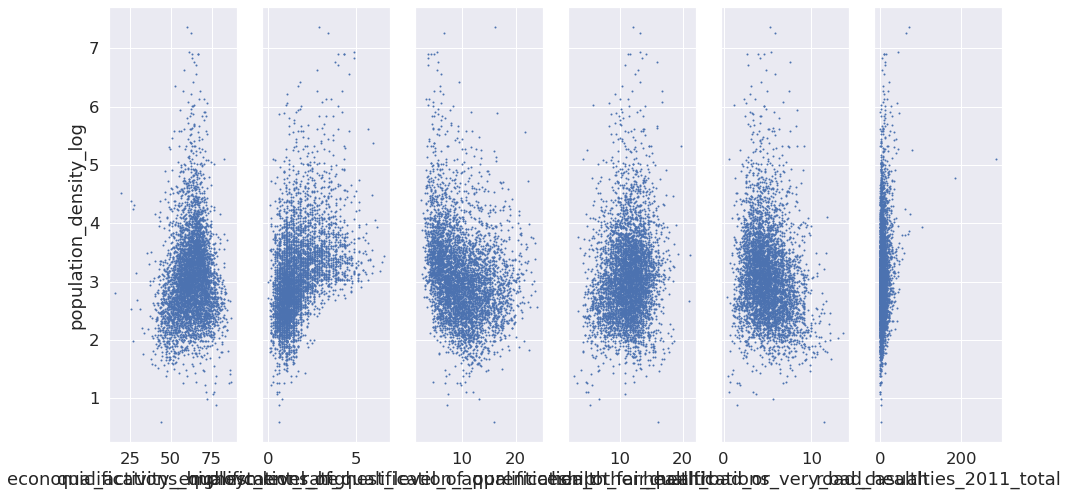

In [26]:
# visualize the relationship between the features and the response using scatterplots

# fig, axs   fig refers to the whole diagram, ax refers to the sub diagram

fig, axs = plt.subplots(1, 6, sharey=True)
lsoa2011.plot(kind='scatter', x='economic_activity_employment_rate', y='population_density_log', ax=axs[0], figsize=(16, 8), s=1)
lsoa2011.plot(kind='scatter', x='qualifications_highest_level_of_qualification_apprenticeship', y='population_density_log', ax=axs[1], s=1)
lsoa2011.plot(kind='scatter', x='qualifications_highest_level_of_qualification_other_qualifications', y='population_density_log', ax=axs[2], s=1)
lsoa2011.plot(kind='scatter', x='health_fair_health', y='population_density_log', ax=axs[3], s=1)
lsoa2011.plot(kind='scatter', x='health_bad_or_very_bad_health', y='population_density_log', ax=axs[4], s=1)
lsoa2011.plot(kind='scatter', x='road_casualties_2011_total', y='population_density_log', ax=axs[5], s=1)

### Correlation Analysis

In [30]:
# without "log population"
# lsoa2011_x = lsoa2011.iloc[:,3:14]

lsoa2011_x = lsoa2011.iloc[:,4:16]

In [28]:
lsoa2011_x.head()

,household_composition_couple_household_without_dependent_children,household_composition_other_multi_person_household,tenure_owned_outright,tenure_owned_with_a_mortgage_or_loan,dwelling_type_whole_house_or_bungalow_detached,dwelling_type_flat_maisonette_or_apartment,economic_activity_employment_rate,qualifications_highest_level_of_qualification_apprenticeship,qualifications_highest_level_of_qualification_other_qualifications,health_fair_health,health_bad_or_very_bad_health,road_casualties_2011_total
0,20.1000,13.6000,12.6000,18.0000,2.2000,78.3000,58.6000,1.0000,7.5000,13.2000,8.7000,1
1,17.3000,7.1000,14.0000,17.7000,1.7000,85.0000,62.3000,0.8000,7.3000,12.4000,9.4000,0
2,29.3000,15.4000,38.3000,21.2000,11.7000,57.8000,65.7000,0.7000,4.7000,10.0000,4.5000,1
3,16.6000,16.3000,15.3000,14.6000,1.0000,87.2000,58.8000,1.1000,6.2000,14.6000,8.2000,12
4,34.6000,13.3000,47.1000,27.6000,27.1000,45.3000,71.8000,0.4000,5.5000,7.3000,3.1000,2


In [31]:
# without "log population"
# lsoa2011_xy = lsoa2011.iloc[:,0:14]

lsoa2011_xy = lsoa2011.iloc[:,0:16]

In [32]:
lsoa2011_x.head()

,household_composition_couple_household_without_dependent_children,household_composition_other_multi_person_household,tenure_owned_outright,tenure_owned_with_a_mortgage_or_loan,dwelling_type_whole_house_or_bungalow_detached,dwelling_type_flat_maisonette_or_apartment,economic_activity_employment_rate,qualifications_highest_level_of_qualification_apprenticeship,qualifications_highest_level_of_qualification_other_qualifications,health_fair_health,health_bad_or_very_bad_health,road_casualties_2011_total
0,20.1000,13.6000,12.6000,18.0000,2.2000,78.3000,58.6000,1.0000,7.5000,13.2000,8.7000,1
1,17.3000,7.1000,14.0000,17.7000,1.7000,85.0000,62.3000,0.8000,7.3000,12.4000,9.4000,0
2,29.3000,15.4000,38.3000,21.2000,11.7000,57.8000,65.7000,0.7000,4.7000,10.0000,4.5000,1
3,16.6000,16.3000,15.3000,14.6000,1.0000,87.2000,58.8000,1.1000,6.2000,14.6000,8.2000,12
4,34.6000,13.3000,47.1000,27.6000,27.1000,45.3000,71.8000,0.4000,5.5000,7.3000,3.1000,2


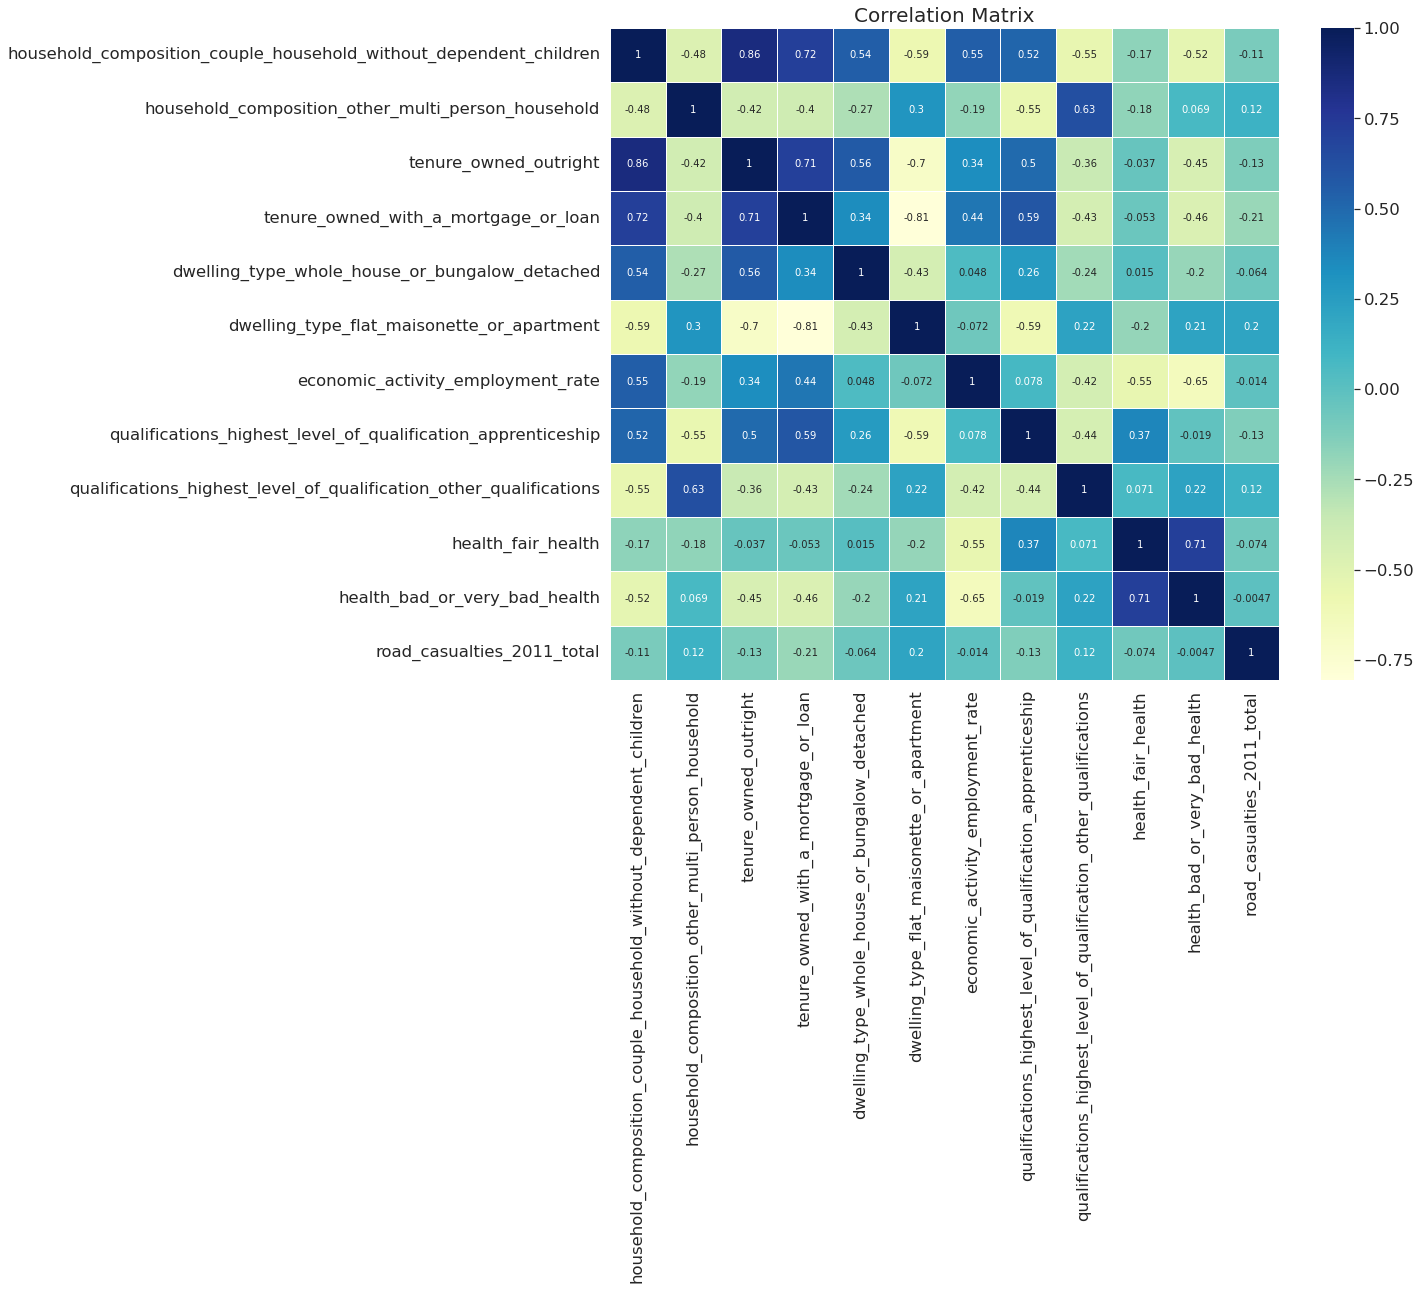

In [33]:
# correlation plot

df = lsoa2011_x
plt.rcParams["axes.grid"] = False
f = plt.figure(figsize=(15, 12))
sn.heatmap(df.corr(),annot=True,linewidth=.5,cmap='YlGnBu')
plt.title('Correlation Matrix',fontsize=20)
plt.show()

#plt.savefig("Correlation Heatmap", dpi=300, bbox_inches = "tight") #,transparent=True

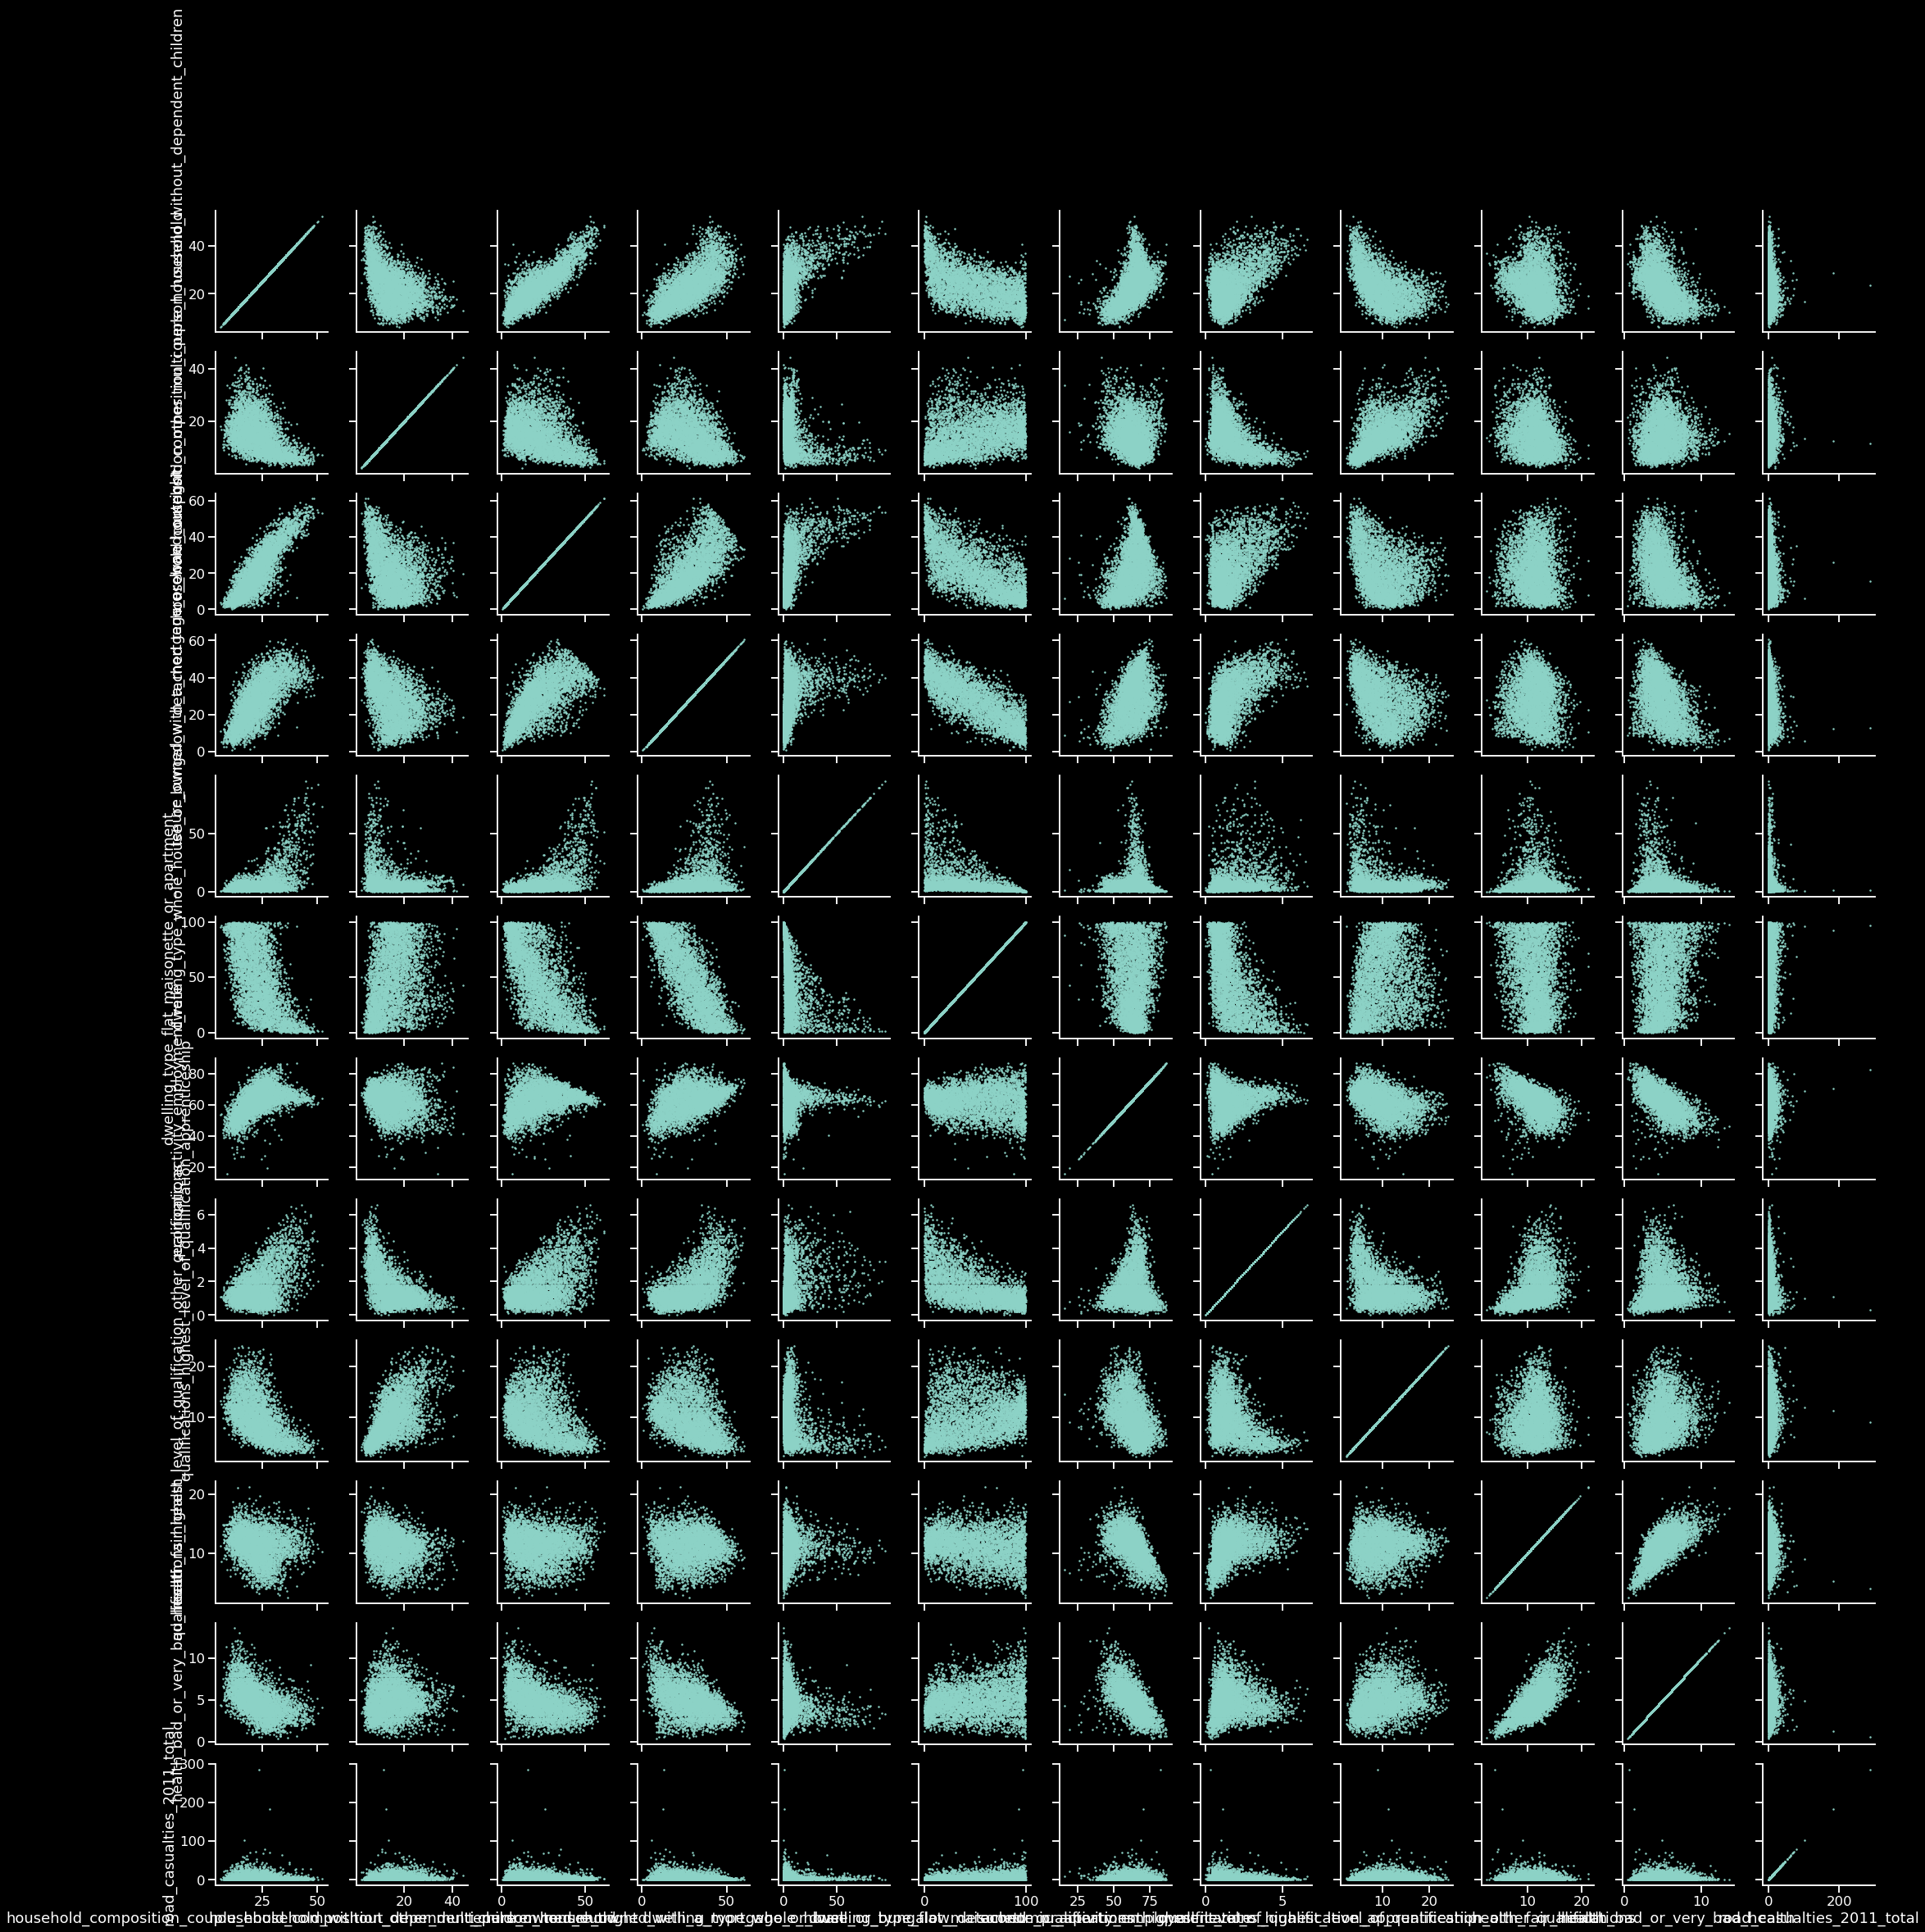

In [34]:
# correlation plot

sns.set(style="ticks", context="talk", font_scale=1, rc={"lines.linewidth": 1})

plt.style.use("dark_background")

g = sns.PairGrid(lsoa2011_x)
cmap = sns.diverging_palette(600,600, center="dark", as_cmap=True)
g.map(plt.scatter, s=1.)  # s = point size


# plt.savefig("PairGrid02", dpi=300, bbox_inches = "tight") 

### VIF

In [35]:
# calculating VIF
# This function is adjusted from: https://stackoverflow.com/a/51329496/4667568
from statsmodels.stats.outliers_influence import variance_inflation_factor 
from statsmodels.tools.tools import add_constant

def drop_column_using_vif_(df, thresh=5):
    '''
    Calculates VIF each feature in a pandas dataframe, and repeatedly drop the columns with the highest VIF
    A constant must be added to variance_inflation_factor or the results will be incorrect

    :param df: the pandas dataframe containing only the predictor features, not the response variable
    :param thresh: (default 5) the threshould VIF value. If the VIF of a variable is greater than thresh, it should be removed from the dataframe
    :return: dataframe with multicollinear features removed
    '''
    while True:
        # adding a constatnt item to the data. add_constant is a function from statsmodels (see the import above)
        df_with_const = add_constant(df)

        vif_df = pd.Series([variance_inflation_factor(df_with_const.values, i) 
               for i in range(df_with_const.shape[1])], name= "VIF",
              index=df_with_const.columns).to_frame()

        # drop the const
        vif_df = vif_df.drop('const')
        
        # if the largest VIF is above the thresh, remove a variable with the largest VIF
        # If there are multiple variabels with VIF>thresh, only one of them is removed. This is because we want to keep as many variables as possible
        if vif_df.VIF.max() > thresh:
            # If there are multiple variables with the maximum VIF, choose the first one
            index_to_drop = vif_df.index[vif_df.VIF == vif_df.VIF.max()].tolist()[0]
            print('Dropping: {}'.format(index_to_drop))
            df = df.drop(columns = index_to_drop)
        else:
            # No VIF is above threshold. Exit the loop
            break

    return df

In [36]:
lsoa2011_x.columns

Index(['household_composition_couple_household_without_dependent_children',
       'household_composition_other_multi_person_household',
       'tenure_owned_outright', 'tenure_owned_with_a_mortgage_or_loan',
       'dwelling_type_whole_house_or_bungalow_detached',
       'dwelling_type_flat_maisonette_or_apartment',
       'economic_activity_employment_rate',
       'qualifications_highest_level_of_qualification_apprenticeship',
       'qualifications_highest_level_of_qualification_other_qualifications',
       'health_fair_health', 'health_bad_or_very_bad_health',
       'road_casualties_2011_total'],
      dtype='object')

In [37]:
# using VIF on the dataset
df_predictors_selected_VIF = drop_column_using_vif_(lsoa2011_x)
# Note that there is a 'while' loop in the drop_column_using_vif_. In each iteration, one variable is dropped.
print("The columns remaining after VIF selection are:")
print(df_predictors_selected_VIF.columns)

Dropping: household_composition_couple_household_without_dependent_children
Dropping: tenure_owned_with_a_mortgage_or_loan
The columns remaining after VIF selection are:
Index(['household_composition_other_multi_person_household',
       'tenure_owned_outright',
       'dwelling_type_whole_house_or_bungalow_detached',
       'dwelling_type_flat_maisonette_or_apartment',
       'economic_activity_employment_rate',
       'qualifications_highest_level_of_qualification_apprenticeship',
       'qualifications_highest_level_of_qualification_other_qualifications',
       'health_fair_health', 'health_bad_or_very_bad_health',
       'road_casualties_2011_total'],
      dtype='object')


### OSL Regression

In [38]:
lsoa2011_xy["population_density_log"] = np.log(lsoa2011_xy['population_density_log'])
model_popu_orig = sm.OLS(endog=lsoa2011_xy[['population_density_log']], exog=sm.add_constant(df_predictors_selected_VIF)).fit()
model_popu_orig.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                              OLS Regression Results                              
==================================================================================
Dep. Variable:     population_density_log   R-squared:                       0.491
Model:                                OLS   Adj. R-squared:                  0.490
Method:                     Least Squares   F-statistic:                     465.6
Date:                    Mon, 30 Jan 2023   Prob (F-statistic):               0.00
Time:                            20:00:58   Log-Likelihood:                 1756.4
No. Observations:                    4835   AIC:                            -3491.
Df Residuals:                        4824   BIC:                            -3420.
Df Model:                              10                                         
Covariance Type:                nonrobust                                         
======================================================================================================================================
                                                                         coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------------------------------------------------------
const                                                                  1.0446      0.041     25.341      0.000       0.964       1.125
household_composition_other_multi_person_household                    -0.0067      0.001    -12.885      0.000      -0.008      -0.006
tenure_owned_outright                                                  0.0005      0.000      1.509      0.131      -0.000       0.001
dwelling_type_whole_house_or_bungalow_detached                         0.0051      0.000     17.803      0.000       0.005       0.006
dwelling_type_flat_maisonette_or_apartment                            -0.0025      0.000    -18.751      0.000      -0.003      -0.002
economic_activity_employment_rate                                      0.0012      0.000      2.902      0.004       0.000       0.002
qualifications_highest_level_of_qualification_apprenticeship           0.0129      0.004      3.653      0.000       0.006       0.020
qualifications_highest_level_of_qualification_other_qualifications     0.0011      0.001      1.304      0.192      -0.001       0.003
health_fair_health                                                     0.0146      0.002      8.354      0.000       0.011       0.018
health_bad_or_very_bad_health                                         -0.0185      0.002     -7.481      0.000      -0.023      -0.014
road_casualties_2011_total                                             0.0082      0.000     29.073      0.000       0.008       0.009
==============================================================================
Omnibus:                      446.339   Durbin-Watson:                   1.551
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             3176.182
Skew:                          -0.037   Prob(JB):                         0.00
Kurtosis:                       6.970   Cond. No.                     1.48e+03
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.48e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

### Residual

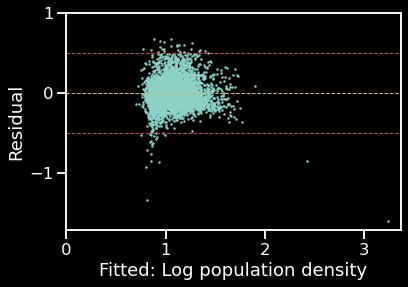

<Figure size 432x288 with 0 Axes>

In [39]:
# plot 
plt.scatter(model_popu_orig.fittedvalues, model_popu_orig.resid, s=1)
# adding title and labels
plt.xlabel('Fitted: Log population density')
plt.ylabel('Residual')
# plt.title('Residual and Fitted Plot of Log Population Density')
plt.yticks(range(-1, 2)) 
plt.xticks(range(0, 4))
plt.axhline(y=0.5, color='r', linestyle='--')
plt.axhline(y=0, color='y', linestyle='--')
plt.axhline(y=-0.5, color='r', linestyle='--')
plt.show()

# plt.savefig("Residual", dpi=300)

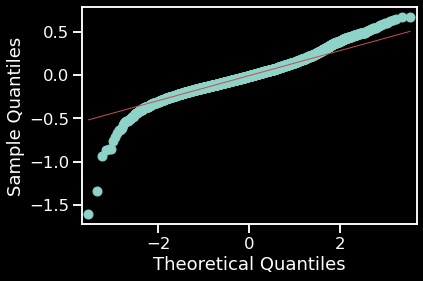

In [40]:
# Q-Q plot 
# check whether normal distributed

res = model_popu_orig.resid
fig = sm.qqplot(data=res, dist=st.norm, line="q")
# plt.title("Normal Q-Q Plot")
plt.show()

In [106]:
# Log Y
# Make the dependent variable conform to a normal distribution

# LOG_population_density = np.log(lsoa2011_xy['population_density'])


In [111]:
# Exporting the analysed data to csv format

# LOG_population_density.to_csv(r'LOG_population_density.csv')